In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
%cd ml

/content/drive/My Drive/ml


In [ ]:
%cd lr

/content/drive/My Drive/ml/lr


**Loding the OriginalDataset**

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('BotnetData1.csv')
df

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack
0,0,0,112641719,3,0,0,0,0,0,0.000000,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,0
1,0,0,112641466,3,0,0,0,0,0,0.000000,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,0
2,0,0,112638623,3,0,0,0,0,0,0.000000,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,0
3,22,6,6453966,15,10,1239,2273,744,0,82.600000,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,0
4,22,6,8804066,14,11,1143,2209,744,0,81.642857,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819121,80,6,10156986,5,5,1089,1923,587,0,217.800000,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,0
819122,80,6,117,2,0,0,0,0,0,0.000000,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,0
819123,80,6,5095331,3,1,0,0,0,0,0.000000,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,0
819124,80,6,5235511,3,1,0,0,0,0,0.000000,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,0



**Find the optimal no of cluster using elbow method**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

# Load your dataset
# Replace 'your_dataset.csv' with the path to your CSV file
data = pd.read_csv('BotnetData1.csv')

# Extracting feature values
X = data.values

# Iterate over each feature
for feature_index in range(X.shape[1]):
    feature_values = X[:, feature_index].reshape(-1, 1)

    # Calculate within-cluster sum of squares (WCSS) for different values of k for the current feature
    wcss = []
    max_clusters = 10
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(feature_values)
        wcss.append(kmeans.inertia_)

    # Plotting the elbow curve for the current feature
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
    plt.title(f'Elbow Method for Optimal Number of Clusters (Feature {feature_index + 1})')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.xticks(np.arange(1, max_clusters + 1, step=1))
    plt.grid(True)
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

**Discretizing data usin K means clustering with n_bins=3**

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Load your dataset
# Replace 'your_dataset.csv' with the path to your CSV file or use any other method to load your data
data = pd.read_csv('BotnetData1.csv')



# Iterate over each feature
for feature_name in data.columns:
    # Extract the current feature values
    feature_values = data[feature_name].values.reshape(-1, 1)

    # Apply K-means clustering to the current feature
    kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters as needed
    cluster_labels = kmeans.fit_predict(feature_values)

    # Add the cluster labels as a new column to the cluster DataFrame
    data[feature_name] = cluster_labels




data.to_csv("KMeansClusterDiscretizedData.csv",index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

 **Data after after discretization**

In [ ]:
import pandas as pd
data = pd.read_csv('KMeansClusterDiscretizedData.csv')



In [ ]:
data

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack
0,0,2,0,0,0,0,0,1,0,0,...,2,0,0,0,0,0,0,0,2,0
1,0,2,0,0,0,0,0,1,0,0,...,2,0,0,0,0,0,0,0,2,0
2,0,2,0,0,0,0,0,1,0,0,...,2,0,0,0,0,0,0,0,2,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819121,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
819122,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
819123,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
819124,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
for columns in data.columns:
  print(columns," ",data[columns].unique())
  for no in data[columns].unique():
    print(no,":",len(data[data[columns]==no]))

Dst Port   [0 2 1]
0 : 633350
2 : 100023
1 : 85753
Protocol   [2 1 0]
2 : 11881
1 : 599907
0 : 207338
Flow Duration   [0 1 2]
0 : 819122
1 : 3
2 : 1
Tot Fwd Pkts   [0 2 1]
0 : 818682
2 : 282
1 : 162
Tot Bwd Pkts   [0 2 1]
0 : 818457
2 : 425
1 : 244
TotLen Fwd Pkts   [0 1 2]
0 : 819122
1 : 3
2 : 1
TotLen Bwd Pkts   [0 2 1]
0 : 818476
2 : 406
1 : 244
Fwd Pkt Len Max   [1 0 2]
1 : 578558
0 : 240564
2 : 4
Fwd Pkt Len Min   [0 2 1]
0 : 610837
2 : 1260
1 : 207029
Fwd Pkt Len Mean   [0 1 2]
0 : 581703
1 : 237419
2 : 4
Fwd Pkt Len Std   [1 2 0]
1 : 512814
2 : 118200
0 : 188112
Bwd Pkt Len Max   [1 2 0]
1 : 556972
2 : 196239
0 : 65915
Bwd Pkt Len Min   [0 1 2]
0 : 618562
1 : 70395
2 : 130169
Bwd Pkt Len Mean   [2 0 1]
2 : 429241
0 : 355083
1 : 34802
Bwd Pkt Len Std   [0 1 2]
0 : 522817
1 : 145397
2 : 150912
Flow Byts/s   [0 2 1]
0 : 816656
2 : 1536
1 : 934
Flow Pkts/s   [0 2 1]
0 : 773786
2 : 32808
1 : 12532
Flow IAT Mean   [0 2 1]
0 : 819123
2 : 2
1 : 1
Flow IAT Std   [0 2 1]
0 : 819122
2 : 1


**Finding the un Wanted feature in the dataset**

In [ ]:
unWantedFeatures=[]
count=0
for columns in data.columns:
  count=0
  for no in data[columns].unique():
    if(len(data[data[columns]==no]) < 1000):
      count+=1
  if(count > 1):
    unWantedFeatures.append(columns)

In [ ]:
unWantedFeatures

['Flow Duration',
 'Tot Fwd Pkts',
 'Tot Bwd Pkts',
 'TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Min',
 'Fwd Header Len',
 'Bwd Header Len',
 'Subflow Fwd Pkts',
 'Subflow Fwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Bwd Byts',
 'Idle Mean',
 'Idle Std',
 'Idle Max']

**Printing data After removing the un Wanted features from the dataset**

In [ ]:
data1 = pd.read_csv('Dataset45.csv')
data1

,Dst Port,Protocol,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,...,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Min,Attack
0,0,2,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,2,0
1,0,2,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,2,0
2,0,2,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,2,0
3,0,1,0,0,0,1,1,0,2,0,...,2,0,0,2,0,0,0,0,0,0
4,0,1,0,0,0,1,1,0,2,0,...,0,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819121,0,1,0,0,0,1,2,0,2,2,...,0,2,0,0,0,0,0,0,0,0
819122,0,1,1,0,1,0,0,0,0,1,...,2,0,0,0,0,0,0,0,0,0
819123,0,1,1,0,1,0,0,0,0,1,...,0,2,0,0,0,0,0,0,0,0
819124,0,1,1,0,1,0,0,0,0,1,...,0,2,0,0,0,0,0,0,0,0


In [ ]:
for columns in data1.columns:
  print(columns," ",data1[columns].unique())
  for no in data1[columns].unique():
    print(no,":",len(data1[data1[columns]==no]))

Dst Port   [0 2 1]
0 : 633350
2 : 100023
1 : 85753
Protocol   [2 1 0]
2 : 11881
1 : 599907
0 : 207338
Fwd Pkt Len Max   [1 0 2]
1 : 578558
0 : 240564
2 : 4
Fwd Pkt Len Min   [0 2 1]
0 : 610837
2 : 1260
1 : 207029
Fwd Pkt Len Mean   [1 0 2]
1 : 581683
0 : 237439
2 : 4
Fwd Pkt Len Std   [0 1 2]
0 : 512814
1 : 118200
2 : 188112
Bwd Pkt Len Max   [0 1 2]
0 : 556972
1 : 196239
2 : 65915
Bwd Pkt Len Min   [0 1 2]
0 : 618562
1 : 70395
2 : 130169
Bwd Pkt Len Mean   [0 2 1]
0 : 429241
2 : 355087
1 : 34798
Bwd Pkt Len Std   [1 0 2]
1 : 522817
0 : 145397
2 : 150912
Flow Byts/s   [0 2 1]
0 : 816656
2 : 1536
1 : 934
Flow Pkts/s   [0 2 1]
0 : 773786
2 : 32808
1 : 12532
Bwd IAT Tot   [0 2 1]
0 : 762429
2 : 17215
1 : 39482
Bwd IAT Mean   [0 1 2]
0 : 771368
1 : 46315
2 : 1443
Bwd IAT Std   [0 2 1]
0 : 737265
2 : 67299
1 : 14562
Bwd IAT Max   [0 1 2]
0 : 728992
1 : 18366
2 : 71768
Fwd PSH Flags   [0 1]
0 : 792788
1 : 26338
Fwd Pkts/s   [0 2 1]
0 : 799889
2 : 12840
1 : 6397
Bwd Pkts/s   [1 0 2]
1 : 78103

**visual representation of the Target Class Data using seaborn countPlot function**

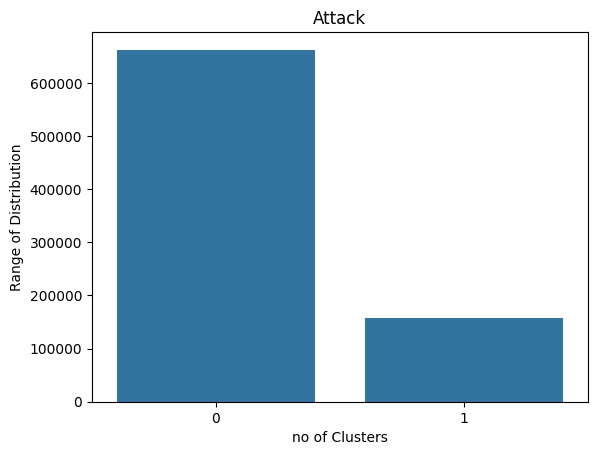

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'column' is the column you want to plot
sns.countplot(data=data1, x='Attack')

# Optionally, customize the plot
plt.title('Attack')
plt.ylabel('Range of Distribution')
plt.xlabel('no of Clusters')

# Show the plot
plt.show()


In [ ]:
data.to_csv("Dataset45.csv",index=False)

In [ ]:
import pandas as pd

data45 = pd.read_csv('Dataset45.csv')
data45

,Dst Port,Protocol,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,...,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Min,Attack
0,0,2,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,2,0
1,0,2,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,2,0
2,0,2,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,2,0
3,0,1,0,0,0,1,1,0,2,0,...,2,0,0,2,0,0,0,0,0,0
4,0,1,0,0,0,1,1,0,2,0,...,0,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819121,0,1,0,0,0,1,2,0,2,2,...,0,2,0,0,0,0,0,0,0,0
819122,0,1,1,0,1,0,0,0,0,1,...,2,0,0,0,0,0,0,0,0,0
819123,0,1,1,0,1,0,0,0,0,1,...,0,2,0,0,0,0,0,0,0,0
819124,0,1,1,0,1,0,0,0,0,1,...,0,2,0,0,0,0,0,0,0,0


In [ ]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

****

HillClimb
**Reading Dataset and Spliting into Test and Train Data**

In [ ]:
from pgmpy.estimators import HillClimbSearch
from pgmpy.models import BayesianModel
import pandas as pd

from sklearn.model_selection import train_test_split

featuresdf = pd.read_csv('Dataset45.csv')

train_data, test_data = train_test_split(featuresdf, test_size=0.2, random_state=42)


**saving both train Data & test Data**

In [ ]:
train_data.to_csv("train_dataHiliclimb.csv",index=False)
test_data.to_csv("test_dataHiliclimb.csv",index=False)

In [ ]:
test_data = pd.read_csv("test_dataHiliclimb.csv")

**Buliding HillClimbing Model using scoringMethod=BicScore**

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BicScore

# Assuming you have your training data loaded as train_data
hc = HillClimbSearch(train_data)

# Initialize a HillClimbSearch object with the training data
best_model = hc.estimate(max_iter=400 , scoring_method=BicScore(train_data))

# Now, you can initialize a Bayesian Network with the learned structure
bayesian_model = BayesianNetwork(best_model.edges())

  0%|          | 0/400 [00:00<?, ?it/s]

**saving the trained model**

In [ ]:
import pickle
with open('HillClimb_train_test_model.pkl', 'wb') as f:
    pickle.dump(best_model , f)
with open('HillClimb_Bayesian_model.pkl', 'wb') as f:
    pickle.dump(bayesian_model , f)

modified 4/5/24


In [ ]:
import pickle
with open('HillClimb_Bayesian_model.pkl', 'rb') as f:
    bayesian_model=pickle.load(f)

In [ ]:
import pandas as pd
train_data = pd.read_csv("train_dataHiliclimb.csv")
test_data =pd.read_csv("test_dataHiliclimb.csv")


**ploting the Bayesian Structure generated by the Trained model**

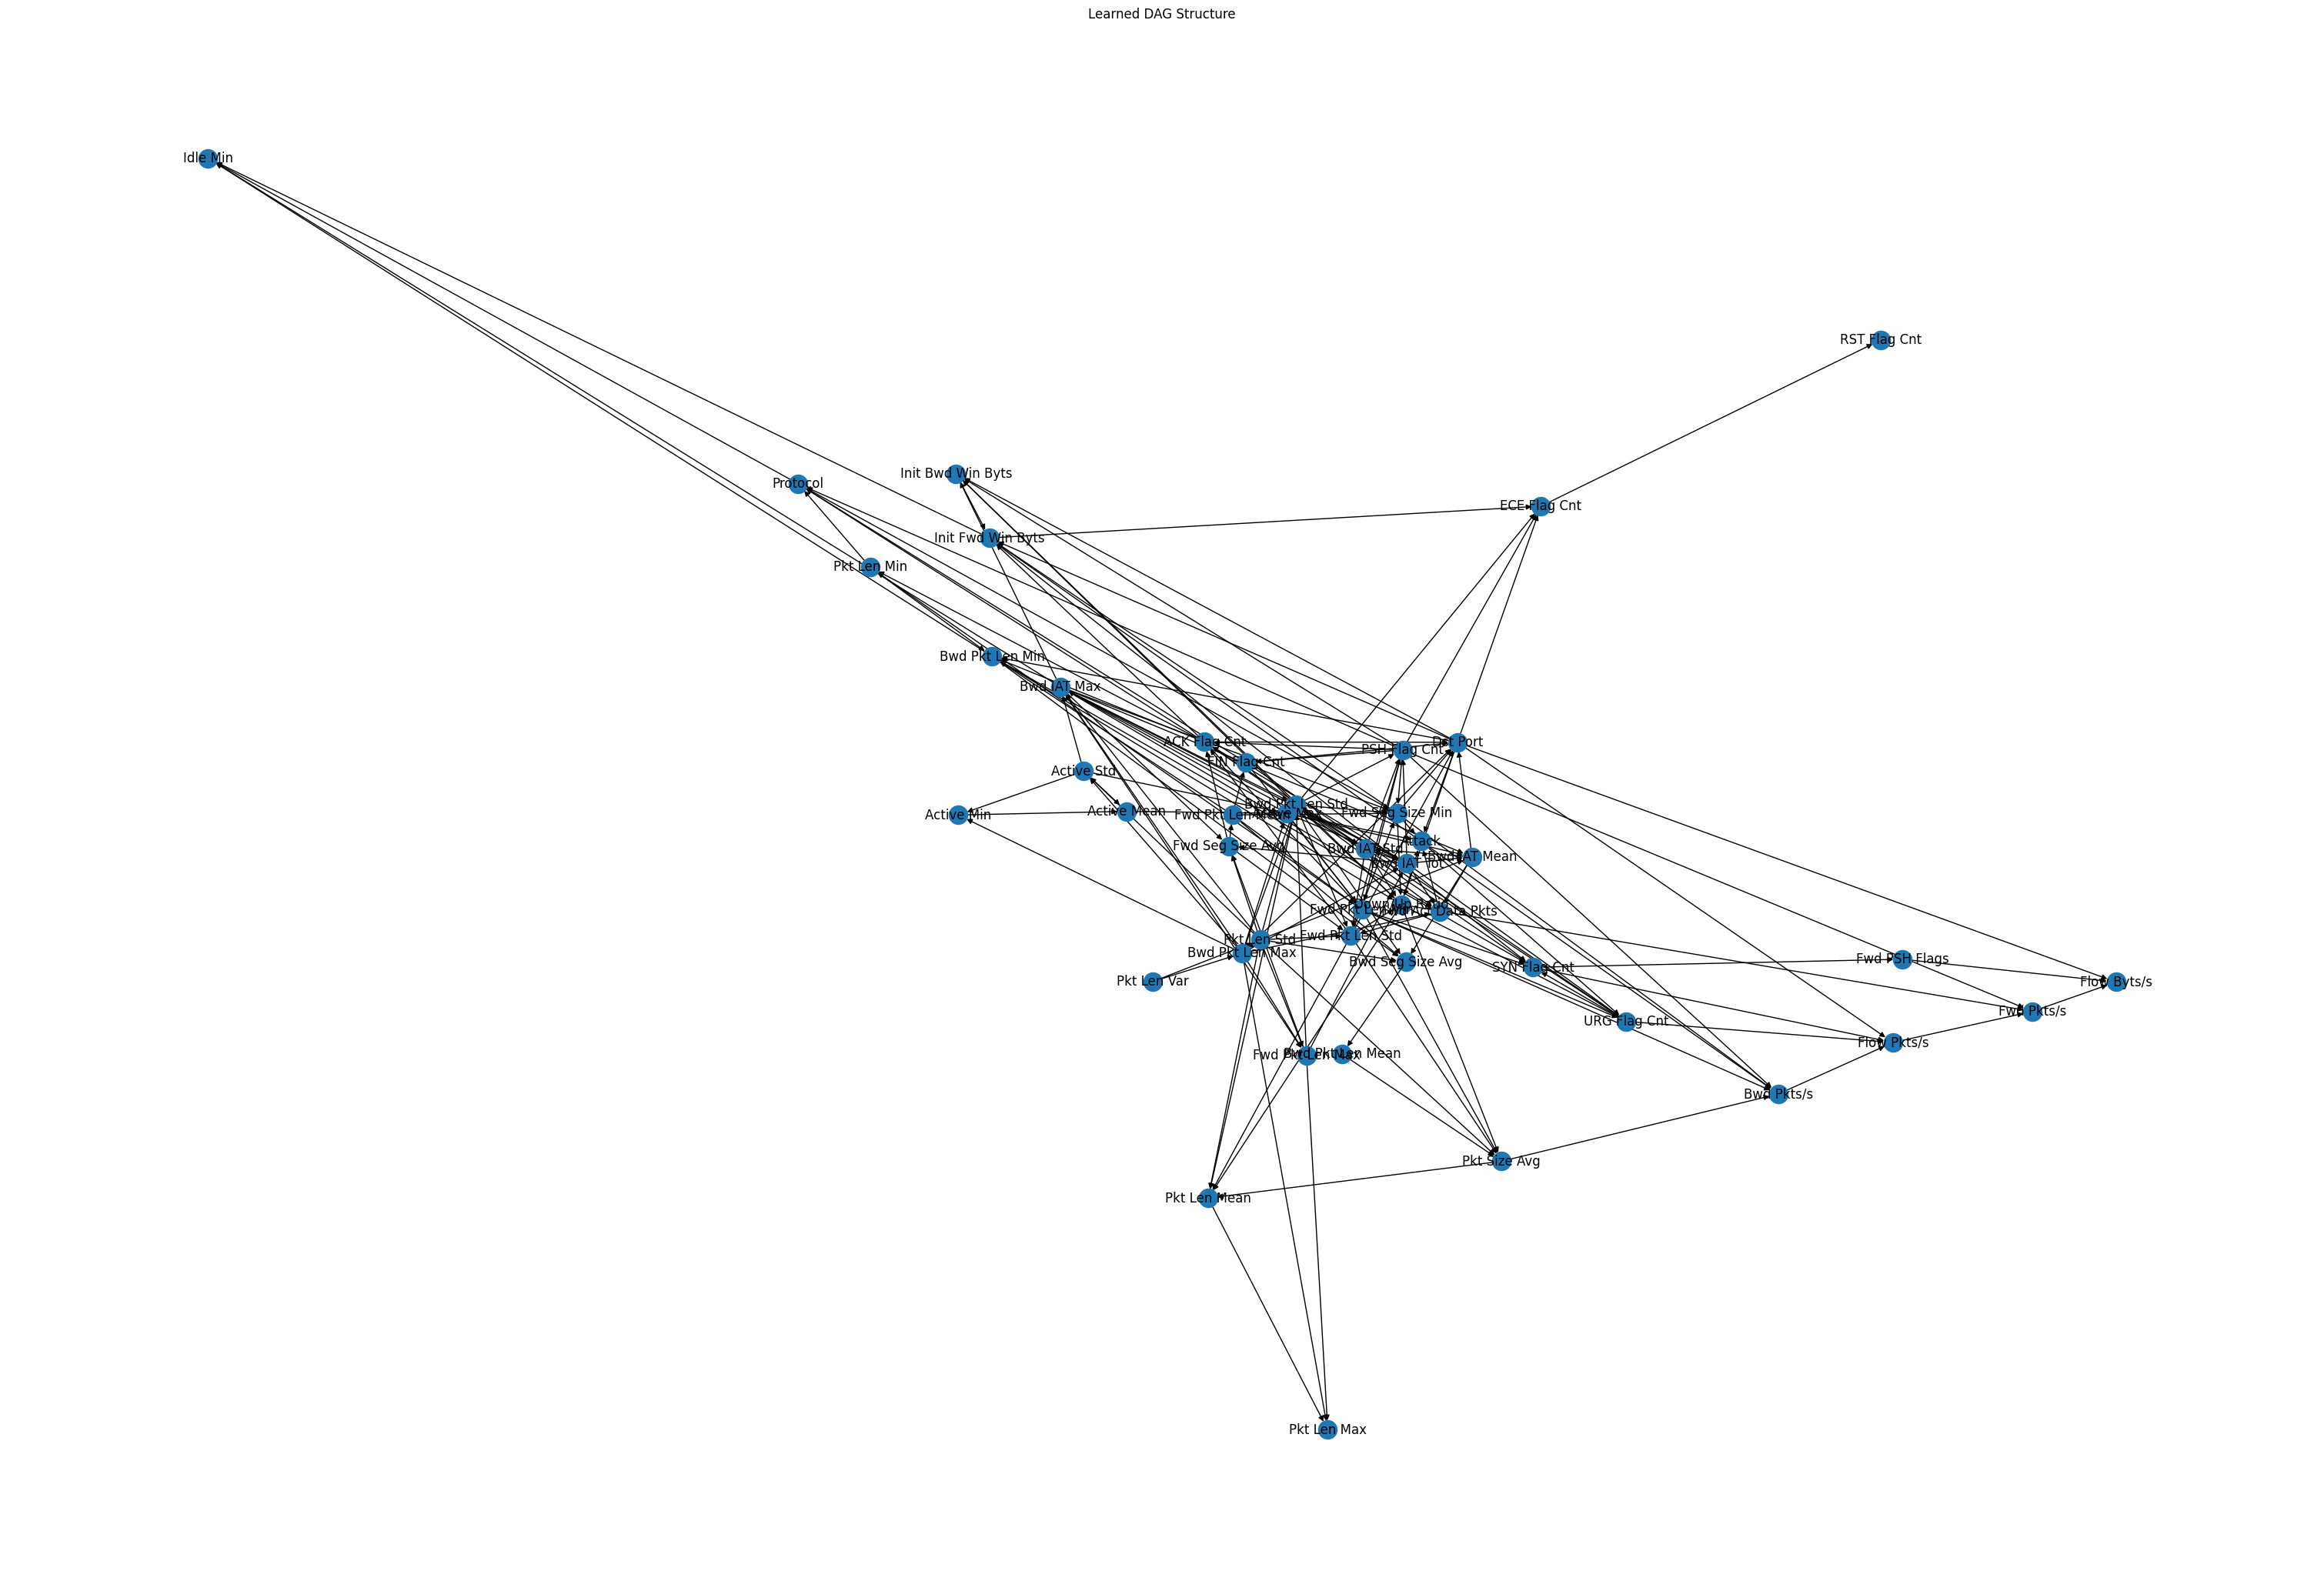

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'essential_graph' is your DAG obtained from the PC algorithm

# Create a directed graph from the DAG edges
dag_graph = nx.DiGraph()
dag_graph.add_edges_from(bayesian_model.edges())

# Plot the DAG structure
plt.figure(figsize=(30, 20))
nx.draw(dag_graph, with_labels=True, arrows=True)
plt.title("Learned DAG Structure")
plt.show()

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator

# Initialize an instance of MaximumLikelihoodEstimator with the loaded model and training data
mle = MaximumLikelihoodEstimator(bayesian_model, train_data)

# Get the list of nodes in the Bayesian network
nodes = bayesian_model.nodes()

# Compute the parameters using Maximum Likelihood Estimation for each node
estimated_parameters = {}
for node in nodes:
    estimated_parameters[node] = mle.estimate_cpd(node=node)

# Print the estimated parameters for each node
count = 0
for node, parameters in estimated_parameters.items():
    count += 1
    print(f"Node: {node}")
    print(parameters)
    print()

# Add the estimated CPDs to the model
for node, cpd in estimated_parameters.items():
    bayesian_model.add_cpds(cpd)

print(count)


Node: Dst Port
+------------------+---------------------+-----+---------------------+---------------------+
| ACK Flag Cnt     | ACK Flag Cnt(1)     | ... | ACK Flag Cnt(2)     | ACK Flag Cnt(2)     |
+------------------+---------------------+-----+---------------------+---------------------+
| Bwd IAT Mean     | Bwd IAT Mean(0)     | ... | Bwd IAT Mean(2)     | Bwd IAT Mean(2)     |
+------------------+---------------------+-----+---------------------+---------------------+
| Bwd Pkt Len Max  | Bwd Pkt Len Max(0)  | ... | Bwd Pkt Len Max(2)  | Bwd Pkt Len Max(2)  |
+------------------+---------------------+-----+---------------------+---------------------+
| FIN Flag Cnt     | FIN Flag Cnt(0)     | ... | FIN Flag Cnt(1)     | FIN Flag Cnt(1)     |
+------------------+---------------------+-----+---------------------+---------------------+
| Fwd Pkt Len Std  | Fwd Pkt Len Std(0)  | ... | Fwd Pkt Len Std(2)  | Fwd Pkt Len Std(2)  |
+------------------+---------------------+-----+-------

**inference using VariableElimination**

In [ ]:
from pgmpy.inference import VariableElimination

# Now, you can perform inference as before
ve = VariableElimination(bayesian_model)
query_variables = ['Attack']
evidence = {
    'Flow Pkts/s': 2,
    'Bwd Pkts/s': 0,
    'Init Fwd Win Byts': 0,
    'Fwd Pkt Len Std': 2,
    'Bwd Pkt Len Max': 1,

    'Fwd Seg Size Min': 1,
}

marginals = ve.query(variables=query_variables, evidence=evidence)
print(marginals)

+-----------+---------------+
| Attack    |   phi(Attack) |
+===========+===============+
| Attack(0) |        0.6112 |
+-----------+---------------+
| Attack(1) |        0.3888 |
+-----------+---------------+


**overall probability of the test dataset**

In [ ]:
attack=0
non_attack =0

# Iterate over each row in the DataFrame
for index, row in test_data.iterrows():
  marginals = ve.query(variables=['Attack'], evidence=row)
  attack= attack + marginals.values[0]
  non_attack = non_attack + marginals.values[1]



In [ ]:
print("Attack probability :",non_attack /len(test_data))
print("Non Attack probability :",attack /len(test_data))

Attack probability : 0.1914998848500147
Non Attack probability : 0.8085001151498076


In [ ]:
import pandas as pd
test_data = pd.read_csv("test_dataHiliclimb.csv")
test_data

,Dst Port,Protocol,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,...,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Min,Attack
0,0,1,0,0,1,1,2,0,2,2,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,1,1,0,0,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,1,0,0,0,0,1,...,1,0,0,2,0,0,0,0,0,1
4,0,0,1,1,1,0,0,2,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163821,0,0,1,1,1,0,0,2,0,1,...,0,0,0,1,0,0,0,0,0,0
163822,2,1,0,0,0,1,1,0,2,2,...,0,1,0,0,0,0,0,0,0,0
163823,2,1,0,0,0,1,1,0,2,2,...,0,1,0,0,0,0,0,0,0,0
163824,0,0,1,1,1,0,0,2,0,1,...,0,0,0,1,0,0,0,0,0,0


**Finding the model accuracy for trained data**

In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator

# Fit parameters to the training data using Maximum Likelihood Estimation (MLE)
bayesian_model.fit(train_data, estimator=MaximumLikelihoodEstimator)

In [ ]:
# Perform inference using the trained model on the test data
y_pred_train = bayesian_model.predict(train_data.drop(columns=['Attack']))

  0%|          | 0/4936 [00:00<?, ?it/s]

In [ ]:
from sklearn.metrics import accuracy_score
# Step 5: Evaluate the model
accuracy = accuracy_score(train_data['Attack'] , y_pred_train)
print("Accuracy:", accuracy)

Accuracy: 0.9996169693270258


**Finding the model accuracy for test data**

In [ ]:
# Perform inference using the trained model on the test data
y_pred_test = bayesian_model.predict(test_data)

  0%|          | 0/2653 [00:00<?, ?it/s]

In [ ]:
from sklearn.metrics import accuracy_score
# Step 5: Evaluate the model
accuracy = accuracy_score(test_data['Attack'] , y_pred_test)
print("Accuracy:", accuracy)

Accuracy: 0.9995788214324954


In [ ]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

In [ ]:
import pandas as pd
from pgmpy.estimators import HillClimbSearch, BicScore

# Load dataset
data = pd.read_csv('DiscreteData.csv')

# Preprocess data as needed
# For example, perform discretization if necessary

# Initialize HillClimbSearch with max_iter parameter
hc = HillClimbSearch(data,  max_iter= 300)

# Use HillClimbSearch to estimate the best network structure
best_model = hc.estimate()

# Print edges of the best model
print("Edges of the best model:")
print(best_model.edges())


TypeError: BaseEstimator.__init__() got an unexpected keyword argument 'max_iter'

In [ ]:
df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack,Non_Attack
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,0,1
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,0,1
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,0,1
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,0.0,0.0,0,0,0.0,0.000000,0,0,0,1
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,0.0,0.0,0,0,0.0,0.000000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,...,0.0,0.0,0,0,0.0,0.000000,0,0,0,1
1048571,80,6,14/02/2018 10:53:33,117,2,0,0,0,0,0,...,0.0,0.0,0,0,0.0,0.000000,0,0,0,1
1048572,80,6,14/02/2018 10:53:28,5095331,3,1,0,0,0,0,...,0.0,0.0,0,0,0.0,0.000000,0,0,0,1
1048573,80,6,14/02/2018 10:53:28,5235511,3,1,0,0,0,0,...,0.0,0.0,0,0,0.0,0.000000,0,0,0,1


In [ ]:
df=df.drop(columns=['Timestamp','Flow Byts/s',],axis=1)

In [ ]:
df

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack,Non_Attack
0,0,0,112641719,3,0,0,0,0,0,0.000000,...,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,0,1
1,0,0,112641466,3,0,0,0,0,0,0.000000,...,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,0,1
2,0,0,112638623,3,0,0,0,0,0,0.000000,...,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,0,1
3,22,6,6453966,15,10,1239,2273,744,0,82.600000,...,0.0,0.0,0,0,0.0,0.000000,0,0,0,1
4,22,6,8804066,14,11,1143,2209,744,0,81.642857,...,0.0,0.0,0,0,0.0,0.000000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,10156986,5,5,1089,1923,587,0,217.800000,...,0.0,0.0,0,0,0.0,0.000000,0,0,0,1
1048571,80,6,117,2,0,0,0,0,0,0.000000,...,0.0,0.0,0,0,0.0,0.000000,0,0,0,1
1048572,80,6,5095331,3,1,0,0,0,0,0.000000,...,0.0,0.0,0,0,0.0,0.000000,0,0,0,1
1048573,80,6,5235511,3,1,0,0,0,0,0.000000,...,0.0,0.0,0,0,0.0,0.000000,0,0,0,1


In [ ]:
df.columns


Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Siz

**1)*find* range**


In [ ]:
import pandas as pd
print(df.Protocol.dtype)


int64


In [ ]:
import pandas as pd

# Load the modified features DataFrame
featuresdf = pd.read_csv('BotnetData1.csv')

In [ ]:
featuresdf=featuresdf.drop(columns=['Flow Byts/s','Flow Pkts/s'],axis=1)

In [ ]:
featuresdf

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack,Non_Attack
0,0,0,112641719,3,0,0,0,0,0,0.000000,...,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,0,1
1,0,0,112641466,3,0,0,0,0,0,0.000000,...,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,0,1
2,0,0,112638623,3,0,0,0,0,0,0.000000,...,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,0,1
3,22,6,6453966,15,10,1239,2273,744,0,82.600000,...,0.0,0.0,0,0,0.0,0.000000,0,0,0,1
4,22,6,8804066,14,11,1143,2209,744,0,81.642857,...,0.0,0.0,0,0,0.0,0.000000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822942,80,6,10156986,5,5,1089,1923,587,0,217.800000,...,0.0,0.0,0,0,0.0,0.000000,0,0,0,1
822943,80,6,117,2,0,0,0,0,0,0.000000,...,0.0,0.0,0,0,0.0,0.000000,0,0,0,1
822944,80,6,5095331,3,1,0,0,0,0,0.000000,...,0.0,0.0,0,0,0.0,0.000000,0,0,0,1
822945,80,6,5235511,3,1,0,0,0,0,0.000000,...,0.0,0.0,0,0,0.0,0.000000,0,0,0,1


In [ ]:
featuresdf['Attack'].value_counts()

Attack
0    662458
1    156668
Name: count, dtype: int64

**Scott's method is based on the standard deviation of the data and the number of observations. The formula for Scott's method to determine the number of bins is:**


In [ ]:
missing_values = featuresdf.isnull().sum()
print(missing_values)
if missing_values.any():
    # Replace missing values with the mean of each column
    featuresdf = featuresdf.fillna(featuresdf.mean())

Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     0
Tot Bwd Pkts     0
                ..
Idle Std         0
Idle Max         0
Idle Min         0
Attack           0
Non_Attack       0
Length: 70, dtype: int64


**Sturges' formula is a method for determining the number of bins in a histogram or frequency distribution. It's a simple formula that calculates the number of bins based on the size of the dataset
[k=1+log2(n)]**

In [ ]:
import numpy as np
count=0
num_bins_dict = {}
for column in featuresdf.columns:
        count=count+1
        ranges=featuresdf[column].max() - featuresdf[column].min()
        print(f"feature no {count} {column} range is {ranges}")
        # Calculate the number of bins using Sturges' formula
        num_bins = np.ceil(np.log2(len(featuresdf[column])) + 1)

        # Store the number of bins for the current feature in the dictionary
        num_bins_dict[column] = num_bins
        bin_width=ranges/num_bins
        print(f"Feature no {count}: {column}, Range: {ranges}, Number of bins: {num_bins} , bin width:{bin_width}")

# Print the dictionary containing the number of bins for each feature
print("\nNumber of bins for each feature:")
print(num_bins_dict)

feature no 1 Dst Port range is 65533
Feature no 1: Dst Port, Range: 65533, Number of bins: 21.0 , bin width:3120.6190476190477
feature no 2 Protocol range is 17
Feature no 2: Protocol, Range: 17, Number of bins: 21.0 , bin width:0.8095238095238095
feature no 3 Flow Duration range is 919130999989
Feature no 3: Flow Duration, Range: 919130999989, Number of bins: 21.0 , bin width:43768142856.61905
feature no 4 Tot Fwd Pkts range is 5114
Feature no 4: Tot Fwd Pkts, Range: 5114, Number of bins: 21.0 , bin width:243.52380952380952
feature no 5 Tot Bwd Pkts range is 9198
Feature no 5: Tot Bwd Pkts, Range: 9198, Number of bins: 21.0 , bin width:438.0
feature no 6 TotLen Fwd Pkts range is 8591554
Feature no 6: TotLen Fwd Pkts, Range: 8591554, Number of bins: 21.0 , bin width:409121.61904761905
feature no 7 TotLen Bwd Pkts range is 13397730
Feature no 7: TotLen Bwd Pkts, Range: 13397730, Number of bins: 21.0 , bin width:637987.1428571428
feature no 8 Fwd Pkt Len Max range is 64440
Feature no 8: 

In [ ]:
import numpy as np
count=0
num_bins_dict = {}
for column in featuresdf.columns:
        count=count+1
        ranges=featuresdf[column].max() - featuresdf[column].min()
        print(f"feature no {count} {column} range is {ranges}")
        # Calculate the number of bins using Sturges' formula
        num_bins = np.ceil(np.log2(len(featuresdf[column])) + 1)

        # Store the number of bins for the current feature in the dictionary
        num_bins_dict[column] = num_bins
        bin_width=np.ceil(ranges/num_bins)

        intervals = {}

        min_val = featuresdf[column].min()
        max_val = featuresdf[column].max()
        bins = np.arange(min_val, max_val + bin_width, bin_width)
        intervals[column] = bins
        print(f"Feature no {count}: {column}, Range: {ranges}, Number of bins: {num_bins} , bin width:{bin_width}")

# # Print the dictionary containing the number of bins for each feature
# print("\nNumber of bins for each feature:")
# print(num_bins_dict)


for column, bins in intervals.items():
    print(f"Intervals for {column}:")
    print(bins)

feature no 1 Dst Port range is 65533
Feature no 1: Dst Port, Range: 65533, Number of bins: 21.0 , bin width:3121.0
feature no 2 Protocol range is 17
Feature no 2: Protocol, Range: 17, Number of bins: 21.0 , bin width:1.0
feature no 3 Flow Duration range is 919130999989
Feature no 3: Flow Duration, Range: 919130999989, Number of bins: 21.0 , bin width:43768142857.0
feature no 4 Tot Fwd Pkts range is 5114
Feature no 4: Tot Fwd Pkts, Range: 5114, Number of bins: 21.0 , bin width:244.0
feature no 5 Tot Bwd Pkts range is 9198
Feature no 5: Tot Bwd Pkts, Range: 9198, Number of bins: 21.0 , bin width:438.0
feature no 6 TotLen Fwd Pkts range is 8591554
Feature no 6: TotLen Fwd Pkts, Range: 8591554, Number of bins: 21.0 , bin width:409122.0
feature no 7 TotLen Bwd Pkts range is 13397730
Feature no 7: TotLen Bwd Pkts, Range: 13397730, Number of bins: 21.0 , bin width:637988.0
feature no 8 Fwd Pkt Len Max range is 64440
Feature no 8: Fwd Pkt Len Max, Range: 64440, Number of bins: 21.0 , bin width